<a href="https://colab.research.google.com/github/karolinaszczesna/Text-Mining/blob/main/IMDB_Reviews_Text_Categorization_Using_Machine_Learning_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Reviews Text Categorization using Logistic Regression, Regularization and KNN classifiers**

Import needed libraries.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#nltk.download('all')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
import tarfile
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from matplotlib import pyplot as plt
import warnings

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [ ]:
# deal with eventual warnings and set seedwarnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
np.random.seed(7)

## **Data preprocessing**

### IMDB reviews dataset acquision

In [ ]:
# uploading the data gz folder
from google.colab import files
uploaded = files.upload()

Saving aclImdb_v1.tar.gz to aclImdb_v1.tar.gz


In [ ]:
# uploading the dataset as file
file = tarfile.open("aclImdb_v1.tar.gz")
file.extractall()

In [ ]:
# read vocabulary of the words
from numpy import loadtxt
vocabulary = loadtxt('/content/aclImdb/imdb.vocab', dtype='str')

# 89 527 words

array(['the', 'and', 'a', ..., 'kinky-sex', 'urrrghhh',
       'investigator-like'], dtype='<U54')

## **Text preprocessing**

In [ ]:
# covert a list to a string for further text cleaning
vocabulary_cleaner = (" ".join(map(str,vocabulary)))

the and a of to is it in i this that was as for with movie but film on not you he are his have be one ! all at by an who they from so like there her or just about if has out what ? some good more when she very even my no up time would which only story really their see had can were me we than well much been get people will bad other also into do because great first how him most don't its made then them way make could too any after movies think characters character watch films two many seen being acting never plot little where love best life did show know does ever here better man your still end over off these say scene why while scenes such go something should through back i'm those watching real though now doesn't thing years actors director another didn't before nothing new funny actually work makes find look old few going same again lot part every cast us world quite want things pretty young seems around got down however can't fact horror take enough both may give original between bi

### Remove unnecessary words (punctuation and numbers)

In [ ]:
# remove punctuation
vocabulary_cleaner = re.sub(r'[^\w\s]','', vocabulary_cleaner)

the and a of to is it in i this that was as for with movie but film on not you he are his have be one  all at by an who they from so like there her or just about if has out what  some good more when she very even my no up time would which only story really their see had can were me we than well much been get people will bad other also into do because great first how him most dont its made then them way make could too any after movies think characters character watch films two many seen being acting never plot little where love best life did show know does ever here better man your still end over off these say scene why while scenes such go something should through back im those watching real though now doesnt thing years actors director another didnt before nothing new funny actually work makes find look old few going same again lot part every cast us world quite want things pretty young seems around got down however cant fact horror take enough both may give original between big own i

In [ ]:
# remove unnecessary numbers
vocabulary_cleaner = re.sub('\d', '', vocabulary_cleaner)

the and a of to is it in i this that was as for with movie but film on not you he are his have be one  all at by an who they from so like there her or just about if has out what  some good more when she very even my no up time would which only story really their see had can were me we than well much been get people will bad other also into do because great first how him most dont its made then them way make could too any after movies think characters character watch films two many seen being acting never plot little where love best life did show know does ever here better man your still end over off these say scene why while scenes such go something should through back im those watching real though now doesnt thing years actors director another didnt before nothing new funny actually work makes find look old few going same again lot part every cast us world quite want things pretty young seems around got down however cant fact horror take enough both may give original between big own i

### Word tokenization

In [ ]:
# create word tokens
vocabulary  = word_tokenize(vocabulary_cleaner)

# 89 513 words

['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'he', 'are', 'his', 'have', 'be', 'one', 'all', 'at', 'by', 'an', 'who', 'they', 'from', 'so', 'like', 'there', 'her', 'or', 'just', 'about', 'if', 'has', 'out', 'what', 'some', 'good', 'more', 'when', 'she', 'very', 'even', 'my', 'no', 'up', 'time', 'would', 'which', 'only', 'story', 'really', 'their', 'see', 'had', 'can', 'were', 'me', 'we', 'than', 'well', 'much', 'been', 'get', 'people', 'will', 'bad', 'other', 'also', 'into', 'do', 'because', 'great', 'first', 'how', 'him', 'most', 'dont', 'its', 'made', 'then', 'them', 'way', 'make', 'could', 'too', 'any', 'after', 'movies', 'think', 'characters', 'character', 'watch', 'films', 'two', 'many', 'seen', 'being', 'acting', 'never', 'plot', 'little', 'where', 'love', 'best', 'life', 'did', 'show', 'know', 'does', 'ever', 'here', 'better', 'man', 'your', 'still', 'end', 'over', 'off', 'these', '

### Stopwords removal

In [ ]:
# remove English stopwords
stop_words = set(stopwords.words('english'))

filtered_vocabulary = [w for w in vocabulary if not w in stop_words] 
filtered_vocabulary = []

for w in vocabulary: 
    if w not in stop_words: 
        filtered_vocabulary.append(w)

# 89 345 words 

['movie', 'film', 'one', 'like', 'good', 'even', 'time', 'would', 'story', 'really', 'see', 'well', 'much', 'get', 'people', 'bad', 'also', 'great', 'first', 'dont', 'made', 'way', 'make', 'could', 'movies', 'think', 'characters', 'character', 'watch', 'films', 'two', 'many', 'seen', 'acting', 'never', 'plot', 'little', 'love', 'best', 'life', 'show', 'know', 'ever', 'better', 'man', 'still', 'end', 'say', 'scene', 'scenes', 'go', 'something', 'back', 'im', 'watching', 'real', 'though', 'doesnt', 'thing', 'years', 'actors', 'director', 'another', 'didnt', 'nothing', 'new', 'funny', 'actually', 'work', 'makes', 'find', 'look', 'old', 'going', 'lot', 'part', 'every', 'cast', 'us', 'world', 'quite', 'want', 'things', 'pretty', 'young', 'seems', 'around', 'got', 'however', 'cant', 'fact', 'horror', 'take', 'enough', 'may', 'give', 'original', 'big', 'ive', 'thought', 'series', 'without', 'right', 'times', 'long', 'always', 'gets', 'action', 'comedy', 'isnt', 'family', 'come', 'point', 'rol

In [ ]:
# read ratings of each movie (y) and the bag of features (X)
file = '/content/aclImdb/train/labeledBow.feat'

import sklearn.datasets
X,y = sklearn.datasets.load_svmlight_file(file, dtype= 'uint8')

### Drop words that appear in less than 1%

In [ ]:
# determine in how many documents each word appears
freq_df = pd.DataFrame(columns = ['Word','Doc Count'])

# drop words that appear in less than 1%
# the total run time of this cell is about 12 minutes
for i in range(len(filtered_vocabulary)):
  freq = X[:,i].count_nonzero()
  freqper = freq/25000
  if freqper > 0.01 and freqper <= 0.8:
    freq_df = freq_df.append({'Word': filtered_vocabulary[i], 'Doc Count': freq}, ignore_index = True)

In [ ]:
freq_df.head(10)

Word Doc Count
0   story     19239
1    well     16164
2    much     16109
3     get     17853
4  people     17462
5     bad     15196
6    also     17973
7   great     13846
8   first     15626
9    dont     14900

In [ ]:
freq_df

Word Doc Count
0         story     19239
1          well     16164
2          much     16109
3           get     17853
4        people     17462
...         ...       ...
1746      cross       252
1747     parker       251
1748      types       253
1749   reaction       252
1750  delivered       254

[1751 rows x 2 columns]

## **Data description**

In [ ]:
# 1751 words
freq_df.describe()

Word  Doc Count
count    1751       1751
unique   1751        992
top     story        292
freq        1          8

In [ ]:
freq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       1751 non-null   object
 1   Doc Count  1751 non-null   object
dtypes: object(2)
memory usage: 27.5+ KB


## **Final dataset for classification problem: 1st approach**



In [ ]:
imdb_keys = list(filtered_vocabulary)
imdb_values = list(range(len(filtered_vocabulary)))

vocab_dict = dict(zip(imdb_keys, imdb_values))
vocab_dict2 = {y: x for x, y in vocab_dict.items()}

In [ ]:
columns = freq_df['Word'].to_numpy()
features=[]
for x in columns:
  features.append(vocab_dict.get(x))

In [ ]:
from ast import YieldFrom
import scipy.sparse
final_df = pd.DataFrame.sparse.from_spmatrix(X)
final_df = final_df.iloc[:,features]

# rename columns
final_df.rename(columns = vocab_dict2, inplace=True)
column_names = list(final_df.columns)
final_df['Rate'] = y

final_df 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-21-8b01b3d755f0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['Rate'] = y
<ipython-input-21-8b01b3d755f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Rate'] 

story  well  much  get  people  bad  also  great  first  dont  ...  \
0          4     0     2    0       0    0     0      0      0     0  ...   
1          2     0     0    0       1    0     1      0      1     0  ...   
2          0     0     0    1       1    0     0      0      0     0  ...   
3          0     0     0    0       0    0     1      1      0     0  ...   
4          0     0     1    1       3    0     1      1      2     0  ...   
...      ...   ...   ...  ...     ...  ...   ...    ...    ...   ...  ...   
24995      8     0     2    4       1    5     1      2      2     0  ...   
24996      2     0     0    0       0    1     2      1      2     0  ...   
24997      2     0     0    2       4    0     2      2      3     0  ...   
24998      0     0     2    2       1    0     2      4      1     0  ...   
24999      3     0     2    0       0    5     0      0      1     0  ...   

       robin  wise  ice  sudden  cross  parker  types  reaction  delivered  \
0          0     0    0       0      0       0      0         0          0   
1          0     0    0       0      0       0      0         0          0   
2          0     0    0       0      0       0      0         0          0   
3          0     0    0       0      0       0      0         0          0   
4          0     0    0       0      0       0      0         0          0   
...      ...   ...  ...     ...    ...     ...    ...       ...        ...   
24995      0     0    0       0      0       0      0         0          1   
24996      0     0    0       0      0       0      0         0          0   
24997      0     0    0       0      0       0      0         0          0   
24998      0     0    0       0      0       0      0         0          0   
24999      0     0    0       0      0       0      0         0          0   

       Rate  
0       9.0  
1       7.0  
2       9.0  
3      10.0  
4       8.0  
...     ...  
24995   1.0  
24996   1.0  
24997   4.0  
24998   2.0  
24999   2.0  

[25000 rows x 1752 columns]

In [ ]:
final_df.to_numpy()

array([[4., 0., 2., ..., 0., 0., 9.],
       [2., 0., 0., ..., 0., 0., 7.],
       [0., 0., 0., ..., 0., 0., 9.],
       ...,
       [2., 0., 0., ..., 0., 0., 4.],
       [0., 0., 2., ..., 0., 0., 2.],
       [3., 0., 2., ..., 0., 0., 2.]])

### Standarization

In [ ]:
# X standarization
xnormal = final_df.drop('Rate', axis=1).to_numpy()
xstand = StandardScaler().fit(xnormal).transform(xnormal)
print(xstand)
print(xstand[:,0].mean())
print(xstand[:,0].std())

[[ 0.27223507 -0.0666329   0.05189838 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.32255425 -0.0666329  -0.77794463 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.91734356 -0.0666329  -0.77794463 ... -0.09931151 -0.09931151
  -0.09987672]
 ...
 [-0.32255425 -0.0666329  -0.77794463 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.91734356 -0.0666329   0.05189838 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.02515959 -0.0666329   0.05189838 ... -0.09931151 -0.09931151
  -0.09987672]]
-8.242295734817162e-18
1.0


In [ ]:
# y standarization
ynormal = final_df['Rate'].to_numpy().reshape(-1,1)
ystand = StandardScaler().fit(ynormal).transform(ynormal)
print(ystand)
print(ystand.mean())
print(ystand.std())

[[ 1.01611816]
 [ 0.43915201]
 [ 1.01611816]
 ...
 [-0.42629721]
 [-1.00326335]
 [-1.00326335]]
1.5916157281026244e-16
1.0


### Z-scores

In [ ]:
import math
z = []
for feature in range(xstand.shape[1]):
  score = (np.dot(xstand[:,feature],ystand))/math.sqrt(xstand.shape[0])
  z.append(float(score))

In [ ]:
z = np.array(z)
z

array([-8.29445937, -2.37920853, 14.07543379, ...,  1.96669551,
        3.5460907 , -6.36689017])

In [ ]:
xstand.shape[1]

1751

In [ ]:
scoredf = pd.DataFrame(columns = ['Word','Z-score'])

for feature in range(xstand.shape[1]):
  score = (np.dot(xstand[:,feature],ystand))/math.sqrt(xstand.shape[0])
  scoredf = scoredf.append({'Word': column_names[feature], 'Z-score': float(score)}, ignore_index = True)

In [ ]:
scoredf

Word    Z-score
0         story  -8.294459
1          well  -2.379209
2          much  14.075434
3           get   1.888901
4        people   6.380806
...         ...        ...
1746      cross   1.688983
1747     parker   3.936386
1748      types   1.966696
1749   reaction   3.546091
1750  delivered  -6.366890

[1751 rows x 2 columns]

Z-score
Word                  
pretty       32.062833
viewer       25.661437
picture      25.268965
interesting  24.739246
saw          20.545087
strong       19.217853
horrible     19.201256
usually      19.201122
liked        18.346952
acted        18.046092
opening      17.520981
wants       -23.818617
reality     -23.872002
real        -24.636393
roles       -25.127076
behind      -25.842413
end         -27.427788
past        -30.743631
heard       -33.466558
wrong       -41.419351
cast        -42.995039

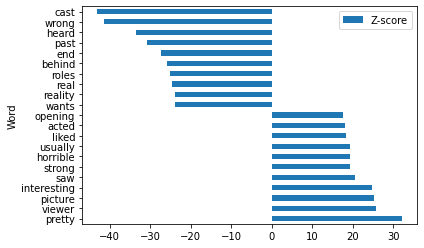

In [ ]:
plot = scoredf.sort_values(by='Z-score', ascending=False)
plot2 = plot.iloc[[0,1,2,3,4,5,6,7,8,9,10,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]
plot2.set_index('Word', inplace = True)
plot2.plot.barh()
plot2

### Top words

In [ ]:
topdf = scoredf.sort_values(by='Z-score', ascending=False)
topdf.head(50)
top_words = topdf['Word'].head(250).to_numpy()
top_words

array(['pretty', 'viewer', 'picture', 'interesting', 'saw', 'strong',
       'horrible', 'usually', 'liked', 'acted', 'opening', 'unless',
       'mostly', 'world', 'almost', 'back', 'cinematography', 'used',
       'ahead', 'father', 'look', 'much', 'despite', 'especially',
       'could', 'academy', 'office', 'bruce', 'difference', 'dvd',
       'ultimately', 'career', 'main', 'previous', 'rent', 'band', 'acts',
       'opinion', 'terrific', 'definitely', 'missed', 'along', 'suddenly',
       'sometimes', 'asks', 'shot', 'supposedly', 'minutes', 'couple',
       'early', 'breaks', 'school', 'mistake', 'basically', 'actress',
       'depth', 'director', 'read', 'falls', 'awful', 'shop', 'color',
       'crazy', 'chance', 'track', 'version', 'sadly', 'rape', 'dark',
       'every', 'drunk', 'cinema', 'number', 'straight', 'dead', 'scared',
       'meaning', 'somewhere', 'takes', 'gets', 'yes', 'better', 'picked',
       'bother', 'tries', 'typical', 'effect', 'rest', 'sees', 'crew',
  

In [ ]:
topdf = topdf.reset_index(drop = True)
topdf

Word    Z-score
0          pretty  32.062833
1          viewer  25.661437
2         picture  25.268965
3     interesting  24.739246
4             saw  20.545087
...           ...        ...
1746          end -27.427788
1747         past -30.743631
1748        heard -33.466558
1749        wrong -41.419351
1750         cast -42.995039

[1751 rows x 2 columns]

In [ ]:
topdf_wc = topdf.loc[0:50]

In [ ]:
topdf_wc.head(10)

Word    Z-score
0       pretty  32.062833
1       viewer  25.661437
2      picture  25.268965
3  interesting  24.739246
4          saw  20.545087
5       strong  19.217853
6     horrible  19.201256
7      usually  19.201122
8        liked  18.346952
9        acted  18.046092

In [ ]:
top_words_wc = ' '.join(topdf_wc['Word'])

In [ ]:
type(top_words_wc)

str

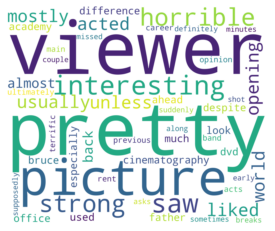

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# create and generate a word cloud image of positive words
wordcloud = WordCloud(background_color = 'white',
                      width=3000,
                      height=2500
                      ).generate(top_words_wc)

# display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Bottom words

In [ ]:
botdf = scoredf.sort_values(by='Z-score', ascending=True)
botdf.head(50)
bot_words=botdf['Word'].head(250).to_numpy()
bot_words

array(['cast', 'wrong', 'heard', 'past', 'end', 'behind', 'roles', 'real',
       'reality', 'wants', 'unfortunately', 'whether', 'hard', 'fans',
       'men', 'dog', 'city', 'ten', 'come', 'show', 'full', 'air',
       'apart', 'appeal', 'however', 'fan', 'bad', 'probably', 'victim',
       'situations', 'romantic', 'although', 'hoping', 'james', 'members',
       'caught', 'changes', 'search', 'big', 'western', 'less',
       'directed', 'may', 'case', 'atmosphere', 'george', 'love', 'bed',
       'give', 'stars', 'life', 'actors', 'second', 'cat', 'die', 'child',
       'hospital', 'death', 'survive', 'trouble', 'british', 'save',
       'science', 'trying', 'little', 'acting', 'horror', 'realize',
       'dick', 'fun', 'possible', 'huge', 'thing', 'fully', 'japanese',
       'moments', 'camera', 'review', 'might', 'done', 'certain', 'keep',
       'movies', 'details', 'happen', 'plot', 'modern', 'joan', 'thus',
       'place', 'confused', 'worse', 'room', 'think', 'opportunity',
  

In [ ]:
botdf = botdf.reset_index(drop = True)
botdf

Word    Z-score
0            cast -42.995039
1           wrong -41.419351
2           heard -33.466558
3            past -30.743631
4             end -27.427788
...           ...        ...
1746          saw  20.545087
1747  interesting  24.739246
1748      picture  25.268965
1749       viewer  25.661437
1750       pretty  32.062833

[1751 rows x 2 columns]

In [ ]:
botdf_wc = botdf.loc[0:50]

In [ ]:
botdf_wc.head(10)

Word    Z-score
0     cast -42.995039
1    wrong -41.419351
2    heard -33.466558
3     past -30.743631
4      end -27.427788
5   behind -25.842413
6    roles -25.127076
7     real -24.636393
8  reality -23.872002
9    wants -23.818617

In [ ]:
bot_words_wc = ' '.join(botdf_wc['Word'])

In [ ]:
type(bot_words_wc)

str

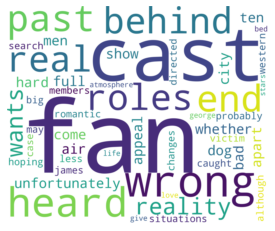

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# create and generate a word cloud image of positive words
wordcloud = WordCloud(background_color = 'white',
                      width=3000,
                      height=2500
                      ).generate(bot_words_wc)

# display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## **Final dataset for classification problem: 2nd approach**

Since the top 250 and bottom 250 words from the 1st approach do not indicate specific positive and negative words, respectively, 2nd approach is presented. It does not involve NLP techniques, such as stopwords removal.

In [ ]:
# read vocabulary of the words
vocabulary = loadtxt('/content/aclImdb/imdb.vocab', dtype='str')

# 89 527 words
vocabulary

array(['the', 'and', 'a', ..., 'kinky-sex', 'urrrghhh',
       'investigator-like'], dtype='<U54')

In [ ]:
# read ratings of each movie (y) and the bag of features (X)
file = '/content/aclImdb/train/labeledBow.feat'

import sklearn.datasets
X,y = sklearn.datasets.load_svmlight_file(file, dtype= 'uint8')

### Drop words that appear in less than 1% and more than 80%

In [ ]:
# determine in how many documents each word appears
freq_df = pd.DataFrame(columns = ['Word','Doc Count'])

# drop words that appear in less than 1% and in more than 80% of the documents
# the total run time of this cell is about 12 minutes
for i in range(len(vocabulary)):
  freq = X[:,i].count_nonzero()
  freqper = freq/25000
  if freqper > 0.01 and freqper <= 0.8:
    freq_df = freq_df.append({'Word': vocabulary[i], 'Doc Count': freq}, ignore_index = True)

In [ ]:
freq_df.head(10)

Word Doc Count
0      i     19239
1    was     16164
2     as     16109
3    for     17853
4   with     17462
5  movie     15196
6    but     17973
7   film     13846
8     on     15626
9    not     14900

In [ ]:
freq_df

Word Doc Count
0              i     19239
1            was     16164
2             as     16109
3            for     17853
4           with     17462
...          ...       ...
1746     portray       252
1747  discovered       251
1748       aware       253
1749   continues       252
1750       below       254

[1751 rows x 2 columns]

In [ ]:
imdb_keys = list(vocabulary)
imdb_values = list(range(len(vocabulary)))

vocab_dict = dict(zip(imdb_keys, imdb_values))
vocab_dict2 = {y: x for x, y in vocab_dict.items()}

In [ ]:
columns = freq_df['Word'].to_numpy()
features=[]
for x in columns:
  features.append(vocab_dict.get(x))

In [ ]:
from ast import YieldFrom
import scipy.sparse
final_df = pd.DataFrame.sparse.from_spmatrix(X)
final_df = final_df.iloc[:,features]

# rename columns
final_df.rename(columns = vocab_dict2, inplace=True)
column_names = list(final_df.columns)
final_df['Rate'] = y

final_df 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-52-8b01b3d755f0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['Rate'] = y
<ipython-input-52-8b01b3d755f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Rate'] 

i  was  as  for  with  movie  but  film  on  not  ...  noticed  \
0      4    0   2    0     0      0    0     0   0    0  ...        0   
1      2    0   0    0     1      0    1     0   1    0  ...        0   
2      0    0   0    1     1      0    0     0   0    1  ...        0   
3      0    1   0    0     0      0    1     1   0    3  ...        0   
4      0    1   1    1     3      0    1     1   2    4  ...        0   
...   ..  ...  ..  ...   ...    ...  ...   ...  ..  ...  ...      ...   
24995  8    3   2    4     1      5    1     2   2    6  ...        0   
24996  2    3   0    0     0      1    2     1   2    0  ...        0   
24997  2    1   0    2     4      0    2     2   3    1  ...        0   
24998  0    0   2    2     1      0    2     4   1    1  ...        0   
24999  3    1   2    0     0      5    0     0   1    0  ...        0   

       discover  opposite  prove  portray  discovered  aware  continues  \
0             0         0      0        0           0      0          0   
1             0         0      0        0           0      0          0   
2             0         0      0        0           0      0          0   
3             0         0      0        0           0      0          0   
4             0         0      0        0           0      0          0   
...         ...       ...    ...      ...         ...    ...        ...   
24995         0         0      0        0           0      0          0   
24996         0         0      0        0           0      0          0   
24997         0         0      0        0           0      0          0   
24998         0         0      0        0           0      0          0   
24999         0         0      0        0           0      0          0   

       below  Rate  
0          0   9.0  
1          0   7.0  
2          0   9.0  
3          0  10.0  
4          0   8.0  
...      ...   ...  
24995      1   1.0  
24996      0   1.0  
24997      0   4.0  
24998      0   2.0  
24999      0   2.0  

[25000 rows x 1752 columns]

In [ ]:
final_df.to_numpy()

array([[4., 0., 2., ..., 0., 0., 9.],
       [2., 0., 0., ..., 0., 0., 7.],
       [0., 0., 0., ..., 0., 0., 9.],
       ...,
       [2., 1., 0., ..., 0., 0., 4.],
       [0., 0., 2., ..., 0., 0., 2.],
       [3., 1., 2., ..., 0., 0., 2.]])

### Standarization

In [ ]:
# X standarization
xnormal = final_df.drop('Rate', axis=1).to_numpy()
xstand = StandardScaler().fit(xnormal).transform(xnormal)
print(xstand)
print(xstand[:,0].mean())
print(xstand[:,0].std())

[[ 0.27223507 -0.77129601  0.05189838 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.32255425 -0.77129601 -0.77794463 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.91734356 -0.77129601 -0.77794463 ... -0.09931151 -0.09931151
  -0.09987672]
 ...
 [-0.32255425 -0.37115489 -0.77794463 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.91734356 -0.77129601  0.05189838 ... -0.09931151 -0.09931151
  -0.09987672]
 [-0.02515959 -0.37115489  0.05189838 ... -0.09931151 -0.09931151
  -0.09987672]]
-8.242295734817162e-18
1.0


In [ ]:
# y standarization
ynormal = final_df['Rate'].to_numpy().reshape(-1,1)
ystand = StandardScaler().fit(ynormal).transform(ynormal)
print(ystand)
print(ystand.mean())
print(ystand.std())

[[ 1.01611816]
 [ 0.43915201]
 [ 1.01611816]
 ...
 [-0.42629721]
 [-1.00326335]
 [-1.00326335]]
1.5916157281026244e-16
1.0


### Z-scores

In [ ]:
import math
z = []
for feature in range(xstand.shape[1]):
  score = (np.dot(xstand[:,feature],ystand))/math.sqrt(xstand.shape[0])
  z.append(float(score))

In [ ]:
z = np.array(z)
z

array([ -8.29445937, -11.25243305,  14.07543379, ...,   1.96669551,
         3.5460907 ,  -6.36689017])

In [ ]:
xstand.shape[1]

1751

In [ ]:
scoredf = pd.DataFrame(columns = ['Word','Z-score'])

for feature in range(xstand.shape[1]):
  score = (np.dot(xstand[:,feature],ystand))/math.sqrt(xstand.shape[0])
  scoredf = scoredf.append({'Word': column_names[feature], 'Z-score': float(score)}, ignore_index = True)

In [ ]:
scoredf

Word    Z-score
0              i  -8.294459
1            was -11.252433
2             as  14.075434
3            for   1.888901
4           with   6.380806
...          ...        ...
1746     portray   1.688983
1747  discovered   3.936386
1748       aware   1.966696
1749   continues   3.546091
1750       below  -6.366890

[1751 rows x 2 columns]

Z-score
Word                
great      32.062833
wonderful  25.661437
excellent  25.268965
best       24.739246
love       20.545087
amazing    19.993092
loved      19.217853
perfect    19.201256
favorite   19.201122
beautiful  18.346952
superb     18.046092
stupid    -23.818617
horrible  -23.872002
no        -24.636393
worse     -25.127076
terrible  -25.842413
?         -27.427788
awful     -30.743631
waste     -33.466558
worst     -41.419351
bad       -42.995039

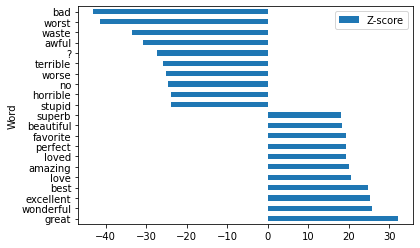

In [ ]:
plot = scoredf.sort_values(by ='Z-score', ascending = False)
plot2 = plot.iloc[[0,1,2,3,4,5,6,7,8,9,10,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]
plot2.set_index('Word', inplace = True)
plot2.plot.barh()
plot2

Horizontal bar plot showing the top 20 features (10 most positive and 10 most negative) from the Simple linear regression with the z-scores as the x-axis and the feature names as the y-axis is shown.

### Top words (positive reviews)

In [ ]:
topdf = scoredf.sort_values(by ='Z-score', ascending = False)
topdf.head(50)
top_words = topdf['Word'].head(250).to_numpy()
top_words

array(['great', 'wonderful', 'excellent', 'best', 'love', 'amazing',
       'loved', 'perfect', 'favorite', 'beautiful', 'superb', 'brilliant',
       'fantastic', 'highly', 'also', 'life', 'very', 'today', 'both',
       'performance', 'beautifully', 'always', 'well', 'as',
       'performances', 'years', 'his', 'wonderfully', 'perfectly',
       'touching', 'outstanding', 'world', 'powerful', 'enjoyed', 'young',
       'greatest', 'moving', 'classic', 'masterpiece', 'terrific',
       'heart', 'recommended', 'true', 'beauty', 'each', 'unique',
       'gives', 'gem', 'family', 'stunning', 'still', 'especially',
       'shows', 'finest', 'job', 'awesome', 'strong', 'definitely',
       'incredible', 'story', 'role', 'simple', 'different', 'delightful',
       'rare', 'oscar', 'lives', 'subtle', 'own', 'memorable', 'emotions',
       'enjoy', 'will', 'remarkable', 'father', 'works', 'supporting',
       'played', 'favourite', 'portrayal', 'sweet', 'between', 'many',
       'plays', 'has

In [ ]:
topdf

Word    Z-score
73       great  32.062833
359  wonderful  25.661437
299  excellent  25.268965
105       best  24.739246
104       love  20.545087
..         ...        ...
36           ? -27.427788
358      awful -30.743631
417      waste -33.466558
230      worst -41.419351
67         bad -42.995039

[1751 rows x 2 columns]

In [ ]:
topdf = topdf.reset_index(drop = True)
topdf

Word    Z-score
0         great  32.062833
1     wonderful  25.661437
2     excellent  25.268965
3          best  24.739246
4          love  20.545087
...         ...        ...
1746          ? -27.427788
1747      awful -30.743631
1748      waste -33.466558
1749      worst -41.419351
1750        bad -42.995039

[1751 rows x 2 columns]

In [ ]:
topdf_wc = topdf.loc[0:50]

In [ ]:
topdf_wc.head(10)

Word    Z-score
0      great  32.062833
1  wonderful  25.661437
2  excellent  25.268965
3       best  24.739246
4       love  20.545087
5    amazing  19.993092
6      loved  19.217853
7    perfect  19.201256
8   favorite  19.201122
9  beautiful  18.346952

In [ ]:
top_words_wc = ' '.join(topdf_wc['Word'])

In [ ]:
type(top_words_wc)

str

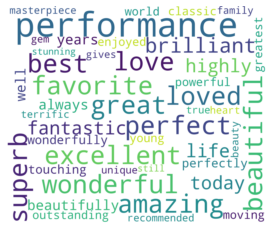

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create and generate a word cloud image of positive words
wordcloud = WordCloud(background_color = 'white',
                      width=3000,
                      height=2500
                      ).generate(top_words_wc)

# display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

The words make sense now. They represent positive adjectives one can provide for a high-rating movie.

### Bottom words (negative reviews)

In [ ]:
botdf = scoredf.sort_values(by ='Z-score', ascending = True)
botdf.head(50)
bot_words = botdf['Word'].head(250).to_numpy()
bot_words

array(['bad', 'worst', 'waste', 'awful', '?', 'terrible', 'worse', 'no',
       'horrible', 'stupid', 'boring', 'crap', 'even', 'nothing', 'poor',
       'minutes', 'avoid', 'acting', 'supposed', 'ridiculous', 'plot',
       'just', 'money', 'poorly', 'lame', 'pointless', "don't", 'script',
       'movie', 'why', 'pathetic', 'wasted', 'annoying', 'thing',
       'garbage', 'oh', 'mess', 'badly', 'laughable', 'redeeming', 'any',
       'unless', 'least', "couldn't", 'make', 'instead', 'cheap', 'if',
       'save', 'there', 'dull', 'excuse', 'could', 'reason', 'or', 'only',
       'anything', 'joke', 'predictable', 'mean', 'bother', 'guy',
       'sucks', 'fails', 'attempt', 'guess', 'dumb', "didn't", 'like',
       'they', 'then', 'sorry', 'do', 'whatsoever', "i'm", 'low',
       'decent', 'would', 'trash', 'bunch', 'was', 'looks', 'someone',
       'seriously', 'off', 'better', 'apparently', "wasn't", 'have',
       'fake', 'unfortunately', 'so', 'ok', 'wooden', 'failed',
       'actua

In [ ]:
botdf

Word    Z-score
67         bad -42.995039
230      worst -41.419351
417      waste -33.466558
358      awful -30.743631
36           ? -27.427788
..         ...        ...
104       love  20.545087
105       best  24.739246
299  excellent  25.268965
359  wonderful  25.661437
73       great  32.062833

[1751 rows x 2 columns]

In [ ]:
botdf = botdf.reset_index(drop = True)
botdf

Word    Z-score
0           bad -42.995039
1         worst -41.419351
2         waste -33.466558
3         awful -30.743631
4             ? -27.427788
...         ...        ...
1746       love  20.545087
1747       best  24.739246
1748  excellent  25.268965
1749  wonderful  25.661437
1750      great  32.062833

[1751 rows x 2 columns]

In [ ]:
botdf_wc = botdf.loc[0:50]

In [ ]:
botdf_wc.head(10)

Word    Z-score
0       bad -42.995039
1     worst -41.419351
2     waste -33.466558
3     awful -30.743631
4         ? -27.427788
5  terrible -25.842413
6     worse -25.127076
7        no -24.636393
8  horrible -23.872002
9    stupid -23.818617

In [ ]:
bot_words_wc = ' '.join(botdf_wc['Word'])

In [ ]:
type(bot_words_wc)

str

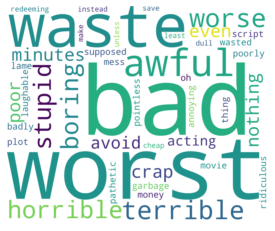

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# set STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("?")
stopwords.add("no")

# create and generate a word cloud image of positive words
wordcloud = WordCloud(stopwords = stopwords,
                      background_color = 'white',
                      width=3000,
                      height=2500
                      ).generate(bot_words_wc)

# display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

The low-rating words also make sense. They are mainly pejorative or negative adjectives.

### Features

In [ ]:
features = np.concatenate((top_words, bot_words), axis = None)
features

array(['great', 'wonderful', 'excellent', 'best', 'love', 'amazing',
       'loved', 'perfect', 'favorite', 'beautiful', 'superb', 'brilliant',
       'fantastic', 'highly', 'also', 'life', 'very', 'today', 'both',
       'performance', 'beautifully', 'always', 'well', 'as',
       'performances', 'years', 'his', 'wonderfully', 'perfectly',
       'touching', 'outstanding', 'world', 'powerful', 'enjoyed', 'young',
       'greatest', 'moving', 'classic', 'masterpiece', 'terrific',
       'heart', 'recommended', 'true', 'beauty', 'each', 'unique',
       'gives', 'gem', 'family', 'stunning', 'still', 'especially',
       'shows', 'finest', 'job', 'awesome', 'strong', 'definitely',
       'incredible', 'story', 'role', 'simple', 'different', 'delightful',
       'rare', 'oscar', 'lives', 'subtle', 'own', 'memorable', 'emotions',
       'enjoy', 'will', 'remarkable', 'father', 'works', 'supporting',
       'played', 'favourite', 'portrayal', 'sweet', 'between', 'many',
       'plays', 'has

## **Split data to train and test samples**

### Train data

In [ ]:
# ratings are transformed to positive (1) and negative (0) for Logistic Regression

# ratings below 5.0 are negative
# ratings above 7.0 are positive
final_df.loc[final_df['Rate'] < 5, 'Rate'] = 0
final_df.loc[final_df['Rate'] >= 7, 'Rate'] = 1
final_df

i  was  as  for  with  movie  but  film  on  not  ...  noticed  \
0      4    0   2    0     0      0    0     0   0    0  ...        0   
1      2    0   0    0     1      0    1     0   1    0  ...        0   
2      0    0   0    1     1      0    0     0   0    1  ...        0   
3      0    1   0    0     0      0    1     1   0    3  ...        0   
4      0    1   1    1     3      0    1     1   2    4  ...        0   
...   ..  ...  ..  ...   ...    ...  ...   ...  ..  ...  ...      ...   
24995  8    3   2    4     1      5    1     2   2    6  ...        0   
24996  2    3   0    0     0      1    2     1   2    0  ...        0   
24997  2    1   0    2     4      0    2     2   3    1  ...        0   
24998  0    0   2    2     1      0    2     4   1    1  ...        0   
24999  3    1   2    0     0      5    0     0   1    0  ...        0   

       discover  opposite  prove  portray  discovered  aware  continues  \
0             0         0      0        0           0      0          0   
1             0         0      0        0           0      0          0   
2             0         0      0        0           0      0          0   
3             0         0      0        0           0      0          0   
4             0         0      0        0           0      0          0   
...         ...       ...    ...      ...         ...    ...        ...   
24995         0         0      0        0           0      0          0   
24996         0         0      0        0           0      0          0   
24997         0         0      0        0           0      0          0   
24998         0         0      0        0           0      0          0   
24999         0         0      0        0           0      0          0   

       below  Rate  
0          0   1.0  
1          0   1.0  
2          0   1.0  
3          0   1.0  
4          0   1.0  
...      ...   ...  
24995      1   0.0  
24996      0   0.0  
24997      0   0.0  
24998      0   0.0  
24999      0   0.0  

[25000 rows x 1752 columns]

In [ ]:
x_train_ds = final_df[features].to_numpy()
y_train_ds = final_df['Rate'].to_numpy()

print(x_train_ds.shape)
print(y_train_ds.shape)

(25000, 500)
(25000,)


### Test data

In [ ]:
#For the test data
file = '/content/aclImdb/test/labeledBow.feat'
X,y = sklearn.datasets.load_svmlight_file(file, dtype= 'uint8')

features2 = []

for x in features:
  features2.append(vocab_dict.get(x))

final_df = pd.DataFrame.sparse.from_spmatrix(X)
final_df = final_df.iloc[:,features2]

# rename columns
final_df.rename(columns = vocab_dict2, inplace=True)
final_df['Rate'] = y

# change continuous score to binary class
final_df.loc[final_df['Rate'] < 5, 'Rate'] = 0
final_df.loc[final_df['Rate'] >= 7, 'Rate'] = 1
final_df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-82-a388e351f0cf>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['Rate'] = y
<ipython-input-82-a388e351f0cf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Rate'

great  wonderful  excellent  best  love  amazing  loved  perfect  \
0          1          0          0     0     0        0      0        0   
1          2          0          0     1     0        0      1        0   
2          1          0          0     0     1        0      0        1   
3          0          0          0     1     0        0      0        0   
4          0          0          0     0     0        0      0        0   
...      ...        ...        ...   ...   ...      ...    ...      ...   
24995      0          0          0     0     0        0      0        0   
24996      0          0          0     0     0        0      0        0   
24997      0          0          0     1     0        0      0        0   
24998      0          0          1     0     0        0      0        0   
24999      0          1          0     0     0        0      0        0   

       favorite  beautiful  ...  cheesy  hated  you'd  cut  mistake  some  \
0             0          0  ...       0      0      0    0        0     0   
1             0          0  ...       0      0      0    0        0     0   
2             0          0  ...       0      0      0    1        0     1   
3             0          0  ...       0      0      0    0        0     1   
4             0          0  ...       0      0      0    0        0     0   
...         ...        ...  ...     ...    ...    ...  ...      ...   ...   
24995         0          0  ...       0      0      0    0        0     3   
24996         0          0  ...       0      0      0    1        0     1   
24997         0          0  ...       0      0      0    0        0     1   
24998         0          0  ...       0      0      0    0        0     0   
24999         0          0  ...       0      0      0    0        0     1   

       killer  i'll  confusing  Rate  
0           0     1          0   1.0  
1           0     0          0   1.0  
2           0     0          0   1.0  
3           0     0          0   1.0  
4           0     0          0   1.0  
...       ...   ...        ...   ...  
24995       0     0          0   0.0  
24996       0     0          0   0.0  
24997       0     0          0   0.0  
24998       0     0          0   0.0  
24999       0     0          0   0.0  

[25000 rows x 501 columns]

In [ ]:
x_test_ds = final_df[features].to_numpy()
y_test_ds = final_df['Rate'].to_numpy()

# standarization
x_test_ds1 = StandardScaler().fit(x_test_ds).transform(x_test_ds)
print(x_test_ds.shape)
print(y_test_ds.shape)

(25000, 500)
(25000,)


## **Modeling**

### Logistic Regression

In [ ]:
# standarization
x_train_ds = StandardScaler().fit(x_train_ds).transform(x_train_ds)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logitreg = LogisticRegression()
fit = logitreg.fit(x_train_ds, y_train_ds)

In [ ]:
# evaluate prediction accuracy on training and testing data
y_train_preds = fit.predict(x_train_ds)
y_test_preds = fit.predict(x_test_ds)

# threshold probabilities
y_train_preds = (y_train_preds > 0.5).astype(int)
y_test_preds = (y_test_preds > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score

# classification accuracy
print(f"train accuracy: {(accuracy_score(y_train_ds, y_train_preds)):.3f}")
print(f"test accuracy: {(accuracy_score(y_test_ds, y_test_preds)):.3f}")

train accuracy: 0.878
test accuracy: 0.826


In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix
print(f"confusion matrix:\n{(confusion_matrix(y_test_ds, y_test_preds))}")

confusion matrix:
[[10451  2049]
 [ 2303 10197]]


In [ ]:
from sklearn.metrics import f1_score

# f1 score
print(f"F1 score (macro): {f1_score(y_test_ds, y_test_preds, average ='macro')}")
print(f"F1 score (micro): {f1_score(y_test_ds, y_test_preds, average ='micro')}")

F1 score (macro): 0.8259020286324469
F1 score (micro): 0.8259200000000001


### Regularized Regression Models

#### Ridge Regression

In [ ]:
ridge_model = LogisticRegression(penalty='l2',C=2, solver='saga', max_iter=1000)
ridge_fit = ridge_model.fit(x_train_ds, y_train_ds)
ridge_train_preds = ridge_fit.predict(x_train_ds)
ridge_test_preds = ridge_fit.predict(x_test_ds)

print(f"train accuracy: {(accuracy_score(y_train_ds, ridge_test_preds)):.3f}")
print(f"test accuracy: {(accuracy_score(y_test_ds, ridge_test_preds)):.3f}")

train accuracy: 0.826
test accuracy: 0.826


In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix
print(f"confusion matrix:\n{(confusion_matrix(y_test_ds, ridge_test_preds))}")

confusion matrix:
[[10451  2049]
 [ 2307 10193]]


In [ ]:
from sklearn.metrics import f1_score

# f1 score
print(f"F1 score (macro): {f1_score(y_test_ds, ridge_test_preds, average ='macro')}")
print(f"F1 score (micro): {f1_score(y_test_ds, ridge_test_preds, average ='micro')}")

F1 score (macro): 0.8257414410452508
F1 score (micro): 0.82576


#### LASSO Regression

In [ ]:
lasso_model = LogisticRegression(penalty='l1',C=2,solver='saga', max_iter=1000)
lasso_fit = lasso_model.fit(x_train_ds, y_train_ds)
lasso_train_preds = lasso_fit.predict(x_train_ds)
lasso_test_preds = lasso_fit.predict(x_test_ds)

print(f"train accuracy: {(accuracy_score(y_train_ds, lasso_test_preds)):.3f}")
print(f"test accuracy: {(accuracy_score(y_test_ds, lasso_test_preds)):.3f}")

train accuracy: 0.826
test accuracy: 0.826


In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix
print(f"confusion matrix:\n{(confusion_matrix(y_test_ds, lasso_test_preds))}")

confusion matrix:
[[10465  2035]
 [ 2309 10191]]


In [ ]:
from sklearn.metrics import f1_score

# f1 score
print(f"F1 score (macro): {f1_score(y_test_ds, lasso_test_preds, average ='macro')}")
print(f"F1 score (micro): {f1_score(y_test_ds, lasso_test_preds, average ='micro')}")

F1 score (macro): 0.8262191251632652
F1 score (micro): 0.8262399999999999


#### Elastic-Net Regression

In [ ]:
elnet_model = LogisticRegression(penalty='elasticnet',solver='saga', l1_ratio=0.15, max_iter=1000)
elnet_fit = elnet_model.fit(x_train_ds, y_train_ds)
elnet_train_preds = elnet_fit.predict(x_train_ds)
elnet_test_preds = elnet_fit.predict(x_test_ds)

print(f"train accuracy: {(accuracy_score(y_train_ds, elnet_test_preds)):.3f}")
print(f"test accuracy: {(accuracy_score(y_test_ds, elnet_test_preds)):.3f}")

train accuracy: 0.826
test accuracy: 0.826


In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix
print(f"confusion matrix:\n{(confusion_matrix(y_test_ds, elnet_test_preds))}")

confusion matrix:
[[10457  2043]
 [ 2306 10194]]


In [ ]:
from sklearn.metrics import f1_score

# f1 score
print(f"F1 score (macro): {f1_score(y_test_ds, elnet_test_preds, average ='macro')}")
print(f"F1 score (micro): {f1_score(y_test_ds, elnet_test_preds, average ='micro')}")

F1 score (macro): 0.8260207456463289
F1 score (micro): 0.82604


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
np.random.seed(1234)

In [ ]:
knn_model = KNeighborsClassifier() #k=5 as default
knn_fit = knn_model.fit(x_train_ds, y_train_ds)
knn_train_preds = knn_fit.predict(x_train_ds)
knn_test_preds = knn_fit.predict(x_test_ds)

In [ ]:
# use validation data to select the best K from range 1-10
X_train, X_valid, y_train, y_valid = train_test_split(
    x_train_ds, y_train_ds, test_size=0.5, random_state=1, shuffle=True)

X_train = StandardScaler().fit(X_train).transform(X_train)
X_valid = StandardScaler().fit(X_valid).transform(X_valid)

0.73528


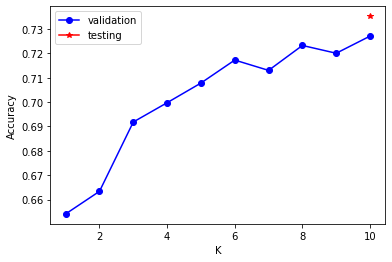

In [ ]:
model_choices=[]
valid_acc = []

n_valid = y_valid.shape[0]

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k) # create a KNN object (OOP)
    knn.fit(X_train, y_train)
    y_valid_pred = knn.predict(X_valid)
    accuracy = np.sum(y_valid_pred == y_valid)/n_valid
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNeighborsClassifier(n_neighbors=best_valid_K)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(x_test_ds)
test_accuracy = np.sum(y_test_pred == y_test_ds)/y_test_ds.shape[0]
print(test_accuracy)

plt.clf()
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

# plt.show()
plt.savefig("training_validation_testing.png",bbox_inches='tight', dpi=400)

In [ ]:
# KNN confusion matrix
print(f"confusion matrix:\n{(confusion_matrix(y_test_ds, knn_test_preds))}")

confusion matrix:
[[6596 5904]
 [4359 8141]]


In [ ]:
from sklearn.metrics import f1_score

# f1 score
print(f"F1 score (macro): {f1_score(y_test_ds, knn_test_preds, average ='macro')}")
print(f"F1 score (micro): {f1_score(y_test_ds, knn_test_preds, average ='micro')}")

F1 score (macro): 0.5879061145489298
F1 score (micro): 0.58948


### ROC curve comparison

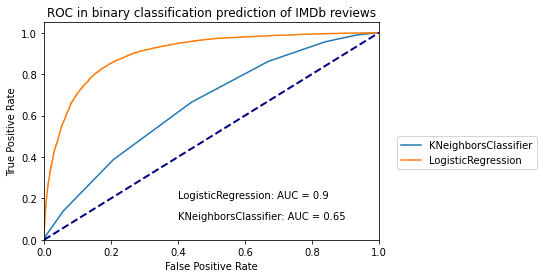

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = [KNeighborsClassifier(n_neighbors=best_valid_K),
          LogisticRegression()]

perf = {}

#sklearn version
for model in models:
    fit = model.fit(x_train_ds, y_train_ds)
    preds = fit.predict_proba(x_test_ds)[:,1]
    fpr, tpr, _ = roc_curve(y_test_ds, preds)
    auroc = roc_auc_score(y_test_ds, preds)
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}

plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in binary classification prediction of IMDb reviews')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")

# plt.show()
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=400)